# CNN

In [2]:
#TensorFlowがGPUを認識しているか確認
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5112051612148540109,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 4866349465
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2232266411750784482
 physical_device_desc: "device: 0, name: GeForce GTX 1660 SUPER, pci bus id: 0000:07:00.0, compute capability: 7.5"]

In [3]:
#tensorflowをtfとしてインポート
import tensorflow as tf

#pltをインポート
%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import re

In [19]:
#import circle.py
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import keras
import numpy as np
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D
from keras.initializers import he_normal
from keras import optimizers
from keras.callbacks import LearningRateScheduler, TensorBoard
from keras.layers.normalization import BatchNormalization
from keras.utils.data_utils import get_file

num_classes  = 10
batch_size   = 128
epochs       = 200
iterations   = 391
dropout      = 0.5
weight_decay = 0.0001
# data loading
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# data preprocessing 
x_train[:,:,:,0] = (x_train[:,:,:,0]-123.680)
x_train[:,:,:,1] = (x_train[:,:,:,1]-116.779)
x_train[:,:,:,2] = (x_train[:,:,:,2]-103.939)
x_test[:,:,:,0] = (x_test[:,:,:,0]-123.680)
x_test[:,:,:,1] = (x_test[:,:,:,1]-116.779)
x_test[:,:,:,2] = (x_test[:,:,:,2]-103.939)


# build model
model = Sequential()

# Block 1
model.add(Conv2D(64,(3, 3), padding='same', name='block1_conv1', input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), padding='same', name='block1_conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

# Block 2
model.add(Conv2D(128, (3, 3), padding='same', name='block2_conv1'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3), padding='same', name='block2_conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

# Block 3
model.add(Conv2D(256, (3, 3), padding='same', name='block3_conv1'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), 
                 kernel_initializer=he_normal(), name='block3_conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), 
                 kernel_initializer=he_normal(), name='block3_conv3'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), 
                 kernel_initializer=he_normal(), name='block3_conv4'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

# Block 4
model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), 
                 kernel_initializer=he_normal(), name='block4_conv1'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), 
                 kernel_initializer=he_normal(), name='block4_conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), 
                 kernel_initializer=he_normal(), name='block4_conv3'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), 
                 kernel_initializer=he_normal(), name='block4_conv4'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

# Block 5
model.add(Conv2D(256,(3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), 
                 kernel_initializer=he_normal(), name='block5_conv1'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(256,(3, 3)), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), 
                 kernel_initializer=he_normal(),name='block5_conv2')
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(256,(3, 3)), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), 
                 kernel_initializer=he_normal(), name='block5_conv3')
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(256,(3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), 
                 kernel_initializer=he_normal(), name='block5_conv4'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))

# model modification for cifar-10
model.add(Flatten(name='flatten'))
model.add(Dense(4096, use_bias = True, name='fc_cifa10'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(4096, name='fc2'))  
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))      

model.add(Dense(10,  name='predictions_cifa10'))        
model.add(BatchNormalization())
model.add(Activation('softmax'))


          
# サマリーを出力
model.summary()

TypeError: add() got an unexpected keyword argument 'padding'

In [5]:
#モデルのコンパイル
#WEIGHTS_PATH = 'layer1channel8_weights.hdf5'
#model.load_weights(WEIGHTS_PATH)
model.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test))

# 绘制训练 & 验证的准确率值
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Train on 35840 samples, validate on 8960 samples
Epoch 1/10
35840/35840 [==============================] - 7s 204us/step - loss: 0.1970 - accuracy: 0.9209 - val_loss: 0.0045 - val_accuracy: 0.9997
Epoch 2/10
35840/35840 [==============================] - 5s 142us/step - loss: 0.0132 - accuracy: 0.9973 - val_loss: 0.0032 - val_accuracy: 0.9998
Epoch 3/10
35840/35840 [==============================] - 5s 143us/step - loss: 0.0016 - accuracy: 0.9999 - val_loss: 7.6685e-04 - val_accuracy: 1.0000
Epoch 4/10
35840/35840 [==============================] - 5s 144us/step - loss: 0.0353 - accuracy: 0.9953 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 5/10
35840/35840 [==============================] - 5s 143us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 5.8518e-04 - val_accuracy: 1.0000
Epoch 6/10
35840/35840 [==============================] - 5s 143us/step - loss: 4.2281e-04 - accuracy: 1.0000 - val_loss: 3.2629e-04 - val_accuracy: 1.0000
Epoch 7/10
35840/35840 [======================

KeyError: 'acc'

In [1]:
#学習済みのモデルでテスト
score = model.evaluate(x_test, y_test)
print('test loss:',score[0])
print('test acc:',score[1])

NameError: name 'model' is not defined

In [6]:
# 学習結果を表示
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = len(loss)

#訓練データ(トレーニングデータ)とは、機械学習の教師あり学習において、人工知能のニューラルネットワークがあらかじめ与えられる、例題と答えについてのデータ。
#この大量のデータをもとに、ニューラルネットワーク自体が出力結果の正否を判断し、最適化を行う。
#統計学や機械学習において何らかの推定を行う際に、トレーニングデータだけでは学習されたモデルを十分に評価できないという問題がある。
#この問題は過剰適合や過学習と呼ばれる。この問題を解決するために、学習に用いないデータを用意し、いくつかの学習モデルの評価を行うことがある。
#この、評価を行うためのデータがテストデータと呼ばれる。
#交差検証においては、標本データをあらかじめトレーニングデータとテストデータに分割し、トレーニングデータで学習し、
#テストデータに学習モデルを適用させることで性能の評価を行う。
plt.plot(range(epochs), loss, label='loss(training data)') #トレーニングデータに対する判定結果のloss
plt.plot(range(epochs), val_loss, label='val_loss(test data)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(range(epochs), acc, label='acc(training data)')
plt.plot(range(epochs), val_acc,  label='val_acc(test data)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

KeyError: 'accuracy'

In [5]:
classes = model.predict(x_test, batch_size=128, verbose=True)
print(classes[0])

8960/8960 [==============================] - 3s 342us/step
[0.04533775 0.81135726 0.02154908 0.0577198  0.06403608]


In [6]:
#circleに対して、各画像のクラス確率
from keras.preprocessing.image import img_to_array, load_img
from keras.models import load_model
import numpy as np
import glob

# テストする画像が入っているディレクトリ
img_path = './data/circle/'

img_list = glob.glob(img_path + '*')
size = (64, 64, 1)

for index, i in enumerate(img_list):
    # 画像をサイズを変えて読み込み、配列化
    test_img = img_to_array(load_img(i, grayscale=True, target_size=size))
    # 0~1の範囲にする
    test_img = test_img / 255
    # 4次元配列に
    test_img = test_img[np.newaxis, ...]
    # 予測
    pre = model.predict(test_img)
    #if np.max(pre[0]) == pre[0, 0]:
     #   print(f'{img_list[index]} -> {pre} は circle')
    if np.max(pre[0]) == pre[0, 1]:
        print(f'{img_list[index]} -> {pre} は other')
        

/Users/li/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


./data/circle/circler04_3023.jpg -> [[0.15107276 0.26434642 0.19922677 0.22864549 0.1567086 ]] は other
./data/circle/circler04_3022.jpg -> [[0.18013506 0.22052911 0.21850449 0.21174316 0.16908814]] は other
./data/circle/circler04_3108.jpg -> [[0.15945223 0.3057879  0.10497709 0.23968485 0.19009799]] は other
./data/circle/circler04_3120.jpg -> [[0.18379651 0.2983462  0.0665744  0.23188813 0.21939471]] は other
./data/circle/circler04_3134.jpg -> [[0.14208269 0.36528078 0.18463613 0.1486836  0.15931684]] は other
./data/circle/circler04_3097.jpg -> [[0.13490732 0.40131196 0.08458898 0.252178   0.12701382]] は other
./data/circle/circler04_3083.jpg -> [[0.07024282 0.50085586 0.22941127 0.15032911 0.04916105]] は other
./data/circle/circler04_3082.jpg -> [[0.08246118 0.50375074 0.20972212 0.14546125 0.05860469]] は other
./data/circle/circler04_3096.jpg -> [[0.14312086 0.34997445 0.08114622 0.27433896 0.15141946]] は other
./data/circle/circler04_3135.jpg -> [[0.13342358 0.4098423  0.1543307  0.

In [7]:
#circleに対して、各画像のクラス確率
from keras.preprocessing.image import img_to_array, load_img
from keras.models import load_model
import numpy as np
import glob

# テストする画像が入っているディレクトリ
img_path = './data/other/'

img_list = glob.glob(img_path + '*')
size = (64, 64, 1)

for index, i in enumerate(img_list):
    # 画像をサイズを変えて読み込み、配列化
    test_img = img_to_array(load_img(i, grayscale=True, target_size=size))
    # 0~1の範囲にする
    test_img = test_img / 255
    # 4次元配列に
    test_img = test_img[np.newaxis, ...]
    # 予測
    pre = model.predict(test_img)
    if np.max(pre[0]) == pre[0, 0]:
        print(f'{img_list[index]} -> {pre} は circle')
        #if np.max(pre[0]) == pre[0, 1]:
         #   print(f'{img_list[index]} -> {pre} は other')

In [8]:
#save model
model_layer2channel2_json = model.to_json()
open("model_architecture.json", mode='w').write(model_layer2channel2_json)

#save weight
model.save_weights("layer2channel2_weights.hdf5")

In [9]:
#出力する中間層を指定
layer_outputs = [layer.output for layer in model.layers[0:6]]
layer_outputs

[<tf.Tensor 'conv2d_1/BiasAdd:0' shape=(?, 64, 64, 1) dtype=float32>,
 <tf.Tensor 'activation_1/Relu:0' shape=(?, 64, 64, 1) dtype=float32>,
 <tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(?, 32, 32, 1) dtype=float32>,
 <tf.Tensor 'flatten_1/Reshape:0' shape=(?, ?) dtype=float32>,
 <tf.Tensor 'dense_1/BiasAdd:0' shape=(?, 5) dtype=float32>,
 <tf.Tensor 'activation_2/Softmax:0' shape=(?, 5) dtype=float32>]

In [10]:
#中間層を出力するモデルを作成
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activation_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 1)         10        
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 1)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5125      
_________________________________________________________________
activation_2 (Activation)    (None, 5)                 0         
Total para

In [21]:
weights = model.get_layer("conv2d_1").get_weights()[0]
weights

array([[[[-0.65123624]],

        [[ 4.729884  ]],

        [[-0.6501497 ]]],


       [[[-2.212854  ]],

        [[-0.9866393 ]],

        [[-2.53119   ]]],


       [[[ 1.85288   ]],

        [[ 1.5893427 ]],

        [[ 1.6806018 ]]]], dtype=float32)

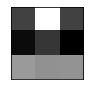

In [19]:
def plot_conv_weights(filters):
    filter_num = filters.shape[3]
    
    for i in range(filter_num):
        plt.subplot(filter_num/6 + 1, 4, i+1)
        plt.imshow(filters[:,:,0,i], cmap="gray")
        plt.xticks([])
        plt.yticks([])
        
plot_conv_weights(model.layers[0].get_weights()[0])

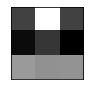

In [23]:
def plot_conv_weights(filters):
    filter_num = filters.shape[3]
    
    for i in range(filter_num):
        plt.subplot(filter_num/6 + 1, 4, i+1)
        plt.imshow(filters[:,:,0,i], cmap="gray")
        plt.xticks([])
        plt.yticks([])
        
plot_conv_weights(model.layers[0].get_weights()[0])

(1, 64, 64, 1)
(1, 64, 64, 1)


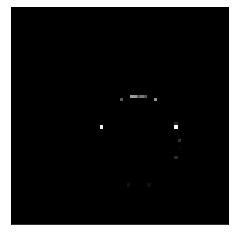

In [25]:
#円の特徴マップ
#check input image
img_path = './data/circle/circler12_1105.jpg'
#img_list = glob.glob(img_path + '*')
size = (64, 64, 1)
img = load_img(img_path, grayscale = True, target_size=size)
x = img_to_array(img)
#x = np.expand_dims(x, axis=0)
img_tensor = x/255
img_tensor = img_tensor[np.newaxis, ...]
print(img_tensor.shape)
#plt.imshow(img_tensor[0])
#plt.show()

activations = activation_model.predict(img_tensor)
#print(len(activations))
#print(activations)

first_layer_activation = activations[1]
print(first_layer_activation.shape)

k = 0
for i in range(1):
    plt.imshow(first_layer_activation[0,:,:,i],cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.savefig('data/l2c2/circle/circle12_1105_%d.jpg'%k)
    k = k + 1
    plt.show()

(1, 64, 64, 1)
(1, 32, 32, 4)


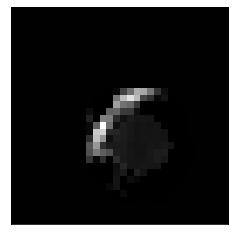

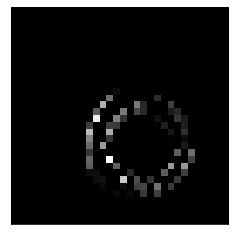

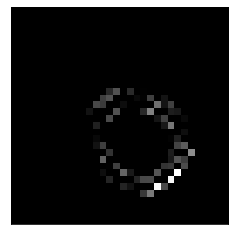

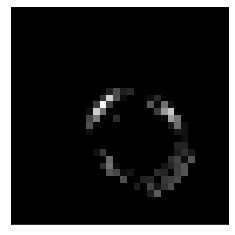

In [13]:
#円の特徴マップ
#check input image
img_path = './data/circle/circler12_1105.jpg'
#img_list = glob.glob(img_path + '*')
size = (64, 64, 1)
img = load_img(img_path, grayscale = True, target_size=size)
x = img_to_array(img)
#x = np.expand_dims(x, axis=0)
img_tensor = x/255
img_tensor = img_tensor[np.newaxis, ...]
print(img_tensor.shape)
#plt.imshow(img_tensor[0])
#plt.show()

activations = activation_model.predict(img_tensor)
#print(len(activations))
#print(activations)

first_layer_activation = activations[4]
print(first_layer_activation.shape)

k = 0
for i in range(4):
    plt.imshow(first_layer_activation[0,:,:,i],cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.savefig('data/l2c2/circle/secondcircle12_1105_%d.jpg'%k)
    k = k + 1
    plt.show()

(1, 64, 64, 1)
(1, 64, 64, 2)


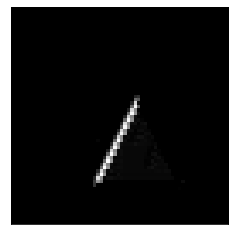

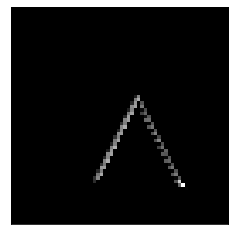

In [14]:
#三角形の特徴マップ
#check input image
img_path = './data/triangle/triangle12_1105.jpg'
#img_list = glob.glob(img_path + '*')
size = (64, 64, 1)
img = load_img(img_path, grayscale = True, target_size=size)
x = img_to_array(img)
#x = np.expand_dims(x, axis=0)
img_tensor = x/255
img_tensor = img_tensor[np.newaxis, ...]
print(img_tensor.shape)
#plt.imshow(img_tensor[0])
#plt.show()

activations = activation_model.predict(img_tensor)
#print(len(activations))
#print(activations)

first_layer_activation = activations[1]
print(first_layer_activation.shape)

k = 0
for i in range(2):
    plt.imshow(first_layer_activation[0,:,:,i],cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.savefig('data/l2c2/triangle/triangle12_1105_%d.jpg'%k)
    k = k + 1
    plt.show()

(1, 64, 64, 1)
(1, 32, 32, 4)


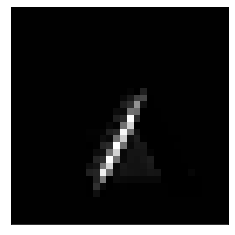

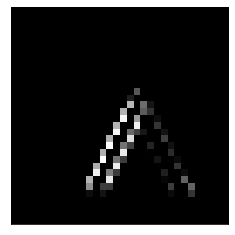

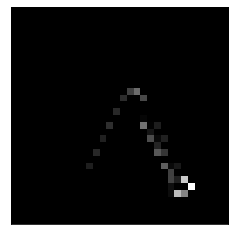

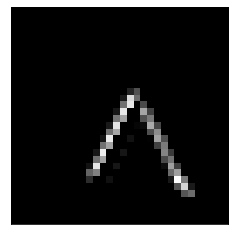

In [18]:
#三角形の特徴マップ
#check input image
img_path = './data/triangle/triangle12_1105.jpg'
#img_list = glob.glob(img_path + '*')
size = (64, 64, 1)
img = load_img(img_path, grayscale = True, target_size=size)
x = img_to_array(img)
#x = np.expand_dims(x, axis=0)
img_tensor = x/255
img_tensor = img_tensor[np.newaxis, ...]
print(img_tensor.shape)
#plt.imshow(img_tensor[0])
#plt.show()

activations = activation_model.predict(img_tensor)
#print(len(activations))
#print(activations)

first_layer_activation = activations[4]
print(first_layer_activation.shape)

k = 0
for i in range(4):
    plt.imshow(first_layer_activation[0,:,:,i],cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.savefig('data/l2c2/triangle/secondtriangle12_1105_%d.jpg'%k)
    k = k + 1
    plt.show()

(1, 64, 64, 1)
(1, 64, 64, 2)


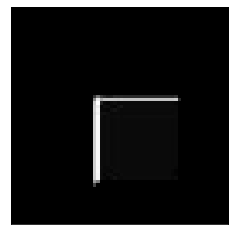

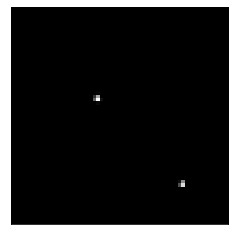

In [19]:
#四角形の特徴マップ
#check input image
img_path = './data/rectangle/rectangle12_1105.jpg'
#img_list = glob.glob(img_path + '*')
size = (64, 64, 1)
img = load_img(img_path, grayscale = True, target_size=size)
x = img_to_array(img)
#x = np.expand_dims(x, axis=0)
img_tensor = x/255
img_tensor = img_tensor[np.newaxis, ...]
print(img_tensor.shape)
#plt.imshow(img_tensor[0])
#plt.show()

activations = activation_model.predict(img_tensor)
#print(len(activations))
#print(activations)

first_layer_activation = activations[1]
print(first_layer_activation.shape)

k = 0
for i in range(2):
    plt.imshow(first_layer_activation[0,:,:,i],cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.savefig('data/l2c2/rectangle/rectangle12_1105_%d.jpg'%k)
    k = k + 1
    plt.show()

(1, 64, 64, 1)
(1, 32, 32, 4)


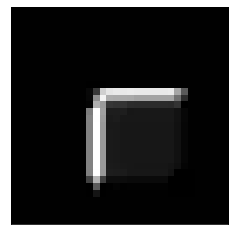

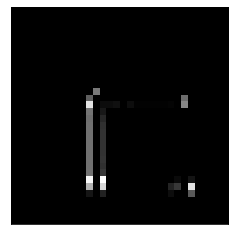

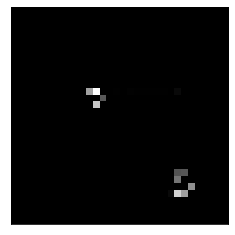

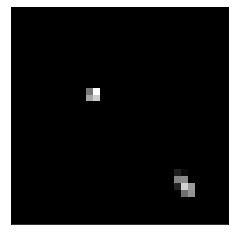

In [21]:
#四角形の特徴マップ
#check input image
img_path = './data/rectangle/rectangle12_1105.jpg'
#img_list = glob.glob(img_path + '*')
size = (64, 64, 1)
img = load_img(img_path, grayscale = True, target_size=size)
x = img_to_array(img)
#x = np.expand_dims(x, axis=0)
img_tensor = x/255
img_tensor = img_tensor[np.newaxis, ...]
print(img_tensor.shape)
#plt.imshow(img_tensor[0])
#plt.show()

activations = activation_model.predict(img_tensor)
#print(len(activations))
#print(activations)

first_layer_activation = activations[4]
print(first_layer_activation.shape)

k = 0
for i in range(4):
    plt.imshow(first_layer_activation[0,:,:,i],cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.savefig('data/l2c2/rectangle/secondrectangle12_1105_%d.jpg'%k)
    k = k + 1
    plt.show()

(1, 64, 64, 1)
(1, 64, 64, 2)


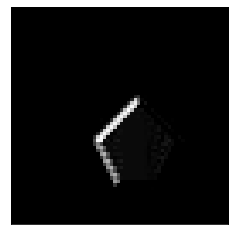

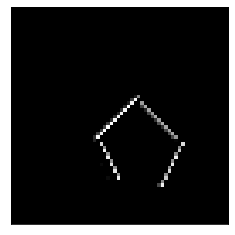

In [22]:
#五角形の特徴マップ
#check input image
img_path = './data/pentagon/pentagon12_1105.jpg'
#img_list = glob.glob(img_path + '*')
size = (64, 64, 1)
img = load_img(img_path, grayscale = True, target_size=size)
x = img_to_array(img)
#x = np.expand_dims(x, axis=0)
img_tensor = x/255
img_tensor = img_tensor[np.newaxis, ...]
print(img_tensor.shape)
#plt.imshow(img_tensor[0])
#plt.show()

activations = activation_model.predict(img_tensor)
#print(len(activations))
#print(activations)

first_layer_activation = activations[1]
print(first_layer_activation.shape)

k = 0
for i in range(2):
    plt.imshow(first_layer_activation[0,:,:,i],cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.savefig('data/l2c2/pentagon/pentagon12_1105_%d.jpg'%k)
    k = k + 1
    plt.show()

(1, 64, 64, 1)
(1, 32, 32, 4)


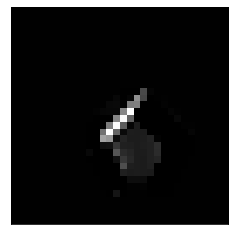

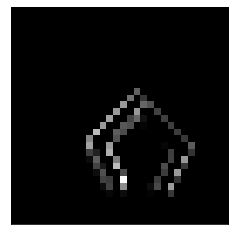

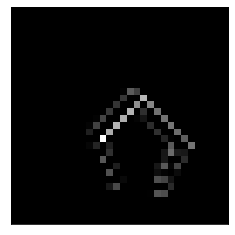

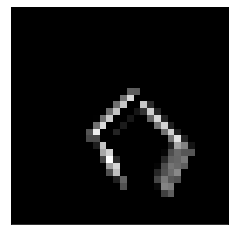

In [23]:
#五角形の特徴マップ
#check input image
img_path = './data/pentagon/pentagon12_1105.jpg'
#img_list = glob.glob(img_path + '*')
size = (64, 64, 1)
img = load_img(img_path, grayscale = True, target_size=size)
x = img_to_array(img)
#x = np.expand_dims(x, axis=0)
img_tensor = x/255
img_tensor = img_tensor[np.newaxis, ...]
print(img_tensor.shape)
#plt.imshow(img_tensor[0])
#plt.show()

activations = activation_model.predict(img_tensor)
#print(len(activations))
#print(activations)

first_layer_activation = activations[4]
print(first_layer_activation.shape)

k = 0
for i in range(4):
    plt.imshow(first_layer_activation[0,:,:,i],cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.savefig('data/l2c2/pentagon/secondpentagon12_1105_%d.jpg'%k)
    k = k + 1
    plt.show()

(1, 64, 64, 1)
(1, 64, 64, 2)


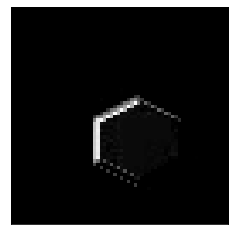

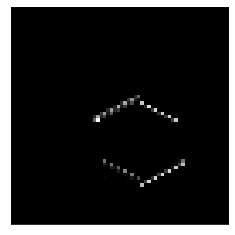

In [24]:
#六角形の特徴マップ
#check input image
img_path = './data/hexagon/hexagon12_1105.jpg'
#img_list = glob.glob(img_path + '*')
size = (64, 64, 1)
img = load_img(img_path, grayscale = True, target_size=size)
x = img_to_array(img)
#x = np.expand_dims(x, axis=0)
img_tensor = x/255
img_tensor = img_tensor[np.newaxis, ...]
print(img_tensor.shape)
#plt.imshow(img_tensor[0])
#plt.show()

activations = activation_model.predict(img_tensor)
#print(len(activations))
#print(activations)

first_layer_activation = activations[1]
print(first_layer_activation.shape)

k = 0
for i in range(2):
    plt.imshow(first_layer_activation[0,:,:,i],cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.savefig('data/l2c2/hexagon/hexagon12_1105_%d.jpg'%k)
    k = k + 1
    plt.show()

(1, 64, 64, 1)
(1, 32, 32, 4)


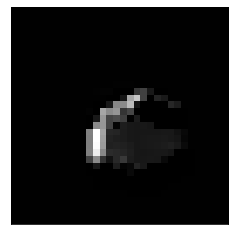

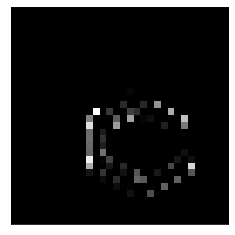

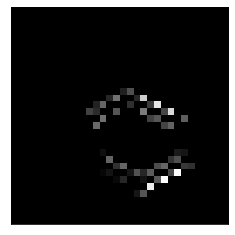

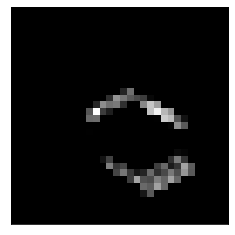

In [25]:
#六角形の特徴マップ
#check input image
img_path = './data/hexagon/hexagon12_1105.jpg'
#img_list = glob.glob(img_path + '*')
size = (64, 64, 1)
img = load_img(img_path, grayscale = True, target_size=size)
x = img_to_array(img)
#x = np.expand_dims(x, axis=0)
img_tensor = x/255
img_tensor = img_tensor[np.newaxis, ...]
print(img_tensor.shape)
#plt.imshow(img_tensor[0])
#plt.show()

activations = activation_model.predict(img_tensor)
#print(len(activations))
#print(activations)

first_layer_activation = activations[4]
print(first_layer_activation.shape)

k = 0
for i in range(4):
    plt.imshow(first_layer_activation[0,:,:,i],cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.savefig('data/l2c2/hexagon/secondhexagon12_1105_%d.jpg'%k)
    k = k + 1
    plt.show()